<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# === Cell 1: Setup & Load with auto-check ===
import os
import pandas as pd

repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_name = "LujainAlmajyul-it326"
dataset_path = f"{repo_name}/Dataset/Raw_dataset.csv"

if os.path.exists("Dataset/Raw_dataset.csv"):
    print(" Found Dataset/Raw_dataset.csv")
    df = pd.read_csv("Dataset/Raw_dataset.csv")

elif os.path.exists(dataset_path):
    print(" Found inside cloned repo")
    df = pd.read_csv(dataset_path)

else:
    print(" Cloning repository from GitHub...")
    !git clone {repo_url}
    if os.path.exists(dataset_path):
        df = pd.read_csv(dataset_path)
    else:
        raise FileNotFoundError("file not found neither locally nor in github")



✅ Found inside cloned repo


#####the code check that there is no problem while reading the file

--------------------------------------------------------------------------------
## missing value , five Number summary

In [8]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

# Five-number summary
num_cols = df.select_dtypes(include=['float64','int64']).columns
five_num = df[num_cols].describe(percentiles=[0.25,0.5,0.75]).T[['min','25%','50%','75%','max']]
print("\nFive-number summary:")
print(five_num)

Missing values per column:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Five-number summary:
                           min          25%          50%          75%  \
StudentID          1001.000000  1598.750000  2196.500000  2794.250000   
Age                  15.000000    15.000000    16.000000    17.000000   
Gender                0.000000     0.000000     1.000000     1.000000   
Ethnicity             0.000000     0.000000     0.000000     2.000000   
ParentalEducation     0.000000     1.000000     2.000000     2.000000   
StudyTimeWeekly       0.001057     5.043079     9.705363    14.408410   
Absences              0.000000     7.000000    15.000000    22.000000   
Tutoring

### Missing values & Five-number summary
- Description: The missing values table shows that the dataset has no missing values.  
- Insight: Since there are no null values, we do not need imputation techniques.  
- Five-number summary: Displays min, Q1, median, Q3, and max for each numeric column.  
- Decision: Different ranges across attributes indicate the need for normalization later.

--------------------------------------------------------------------------------
## histogram

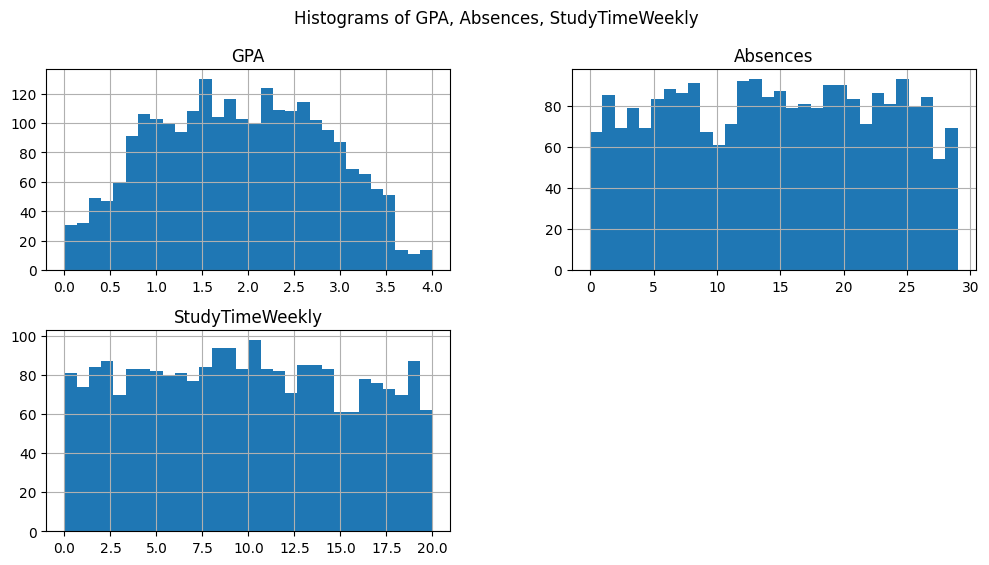

In [9]:
df[['GPA','Absences','StudyTimeWeekly']].hist(bins=30, figsize=(12,6))
plt.suptitle("Histograms of GPA, Absences, StudyTimeWeekly")
plt.show()

### Histogram
- Description: The histograms display the distributions of GPA, Absences, and StudyTimeWeekly.  
- Insight: Absences shows a long tail with extreme values, and GPA distribution is not uniform.  
- Decision: Indicates the need for outlier handling (capping) and normalization.

--------------------------------------------------------------------------------
## box plot & outliers

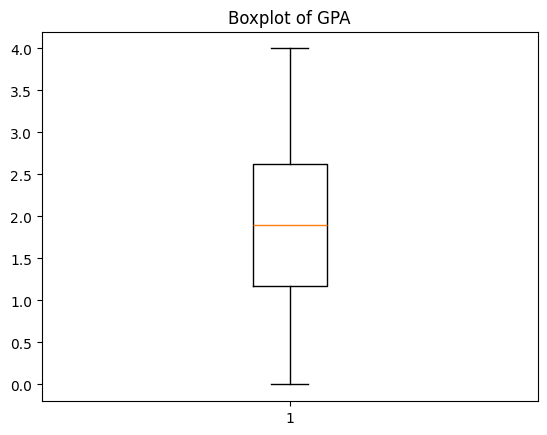

GPA: Outliers=0


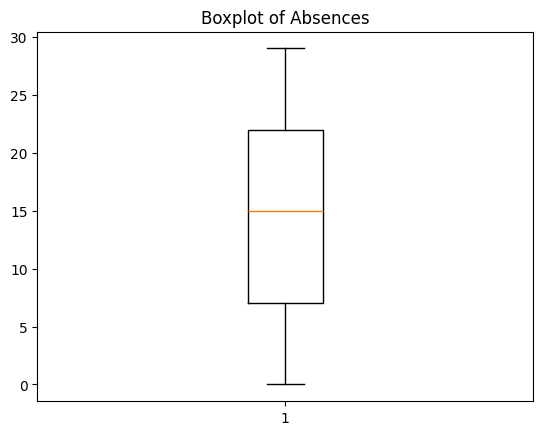

Absences: Outliers=0


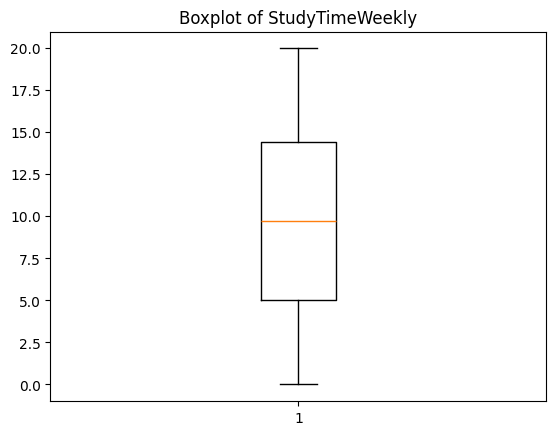

StudyTimeWeekly: Outliers=0


In [10]:
def iqr_bounds(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

for c in ['GPA','Absences','StudyTimeWeekly']:
    plt.figure()
    plt.boxplot(df[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

    lo, hi = iqr_bounds(df[c])
    outliers = ((df[c] < lo) | (df[c] > hi)).sum()
    print(f"{c}: Outliers={outliers}")

### Boxplots & Outliers
- Description: The boxplots display the spread of GPA, Absences, and StudyTimeWeekly.  
- Insight: No significant outliers were detected for these attributes.  
- Decision: Since the values are within reasonable bounds, no heavy outlier treatment is required. However, normalization is still needed because the ranges of the variables are different.

--------------------------------------------------------------------------------
## bar plot

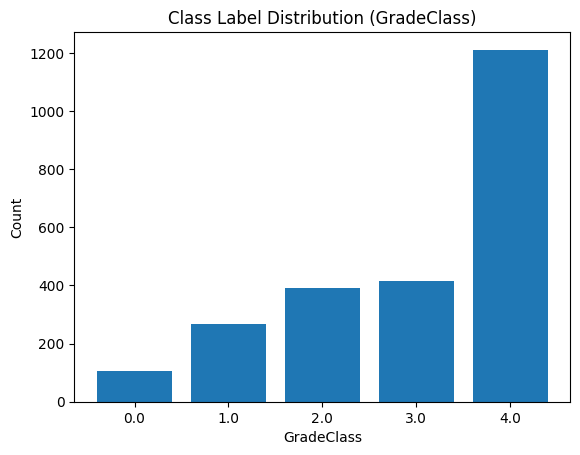

In [14]:
counts = df['GradeClass'].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class Label Distribution (GradeClass)")
plt.xlabel("GradeClass")
plt.ylabel("Count")
plt.show()


### Bar plot (Class Label Distribution)
- Description: The bar plot shows the frequency of each grade class.  
- Insight: The dataset is imbalanced, with many students in classes A and C and fewer in class F.  
- Decision: Class imbalance should be considered in the preprocessing and evaluation stages.

--------------------------------------------------------------------------------
## sactter plot

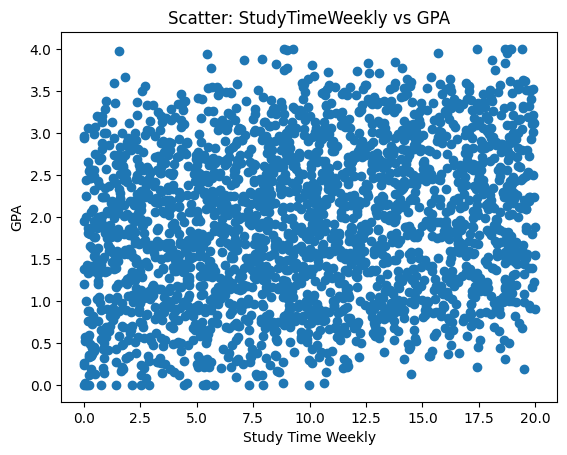

In [13]:
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.title("Scatter: StudyTimeWeekly vs GPA")
plt.xlabel("Study Time Weekly")
plt.ylabel("GPA")
plt.show()

### Scatter Plot (StudyTimeWeekly vs GPA)
- Description: The scatter plot shows the relationship between weekly study time and GPA.  
- Insight: There is a weak positive trend: students who study more tend to have higher GPA.  
- Decision: Confirms that StudyTimeWeekly is an important predictor and may benefit from normalization.
